In [15]:
!pip install drillvision


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
from neural_network_model.bit_vision import BitVision

In [17]:
from pathlib import Path

In [18]:
obj = BitVision(
    train_test_val_dir=Path("__file__").parent / ".." / "dataset_train_test_val"
)


In [19]:
print(obj.categories)


['pdc_bit', 'rollercone_bit']


In [20]:
print(obj.data_details)


{'test': {'pdc_bit': 2, 'rollercone_bit': 2}, 'train': {'pdc_bit': 7, 'rollercone_bit': 7}, 'val': {'pdc_bit': 1, 'rollercone_bit': 1}}


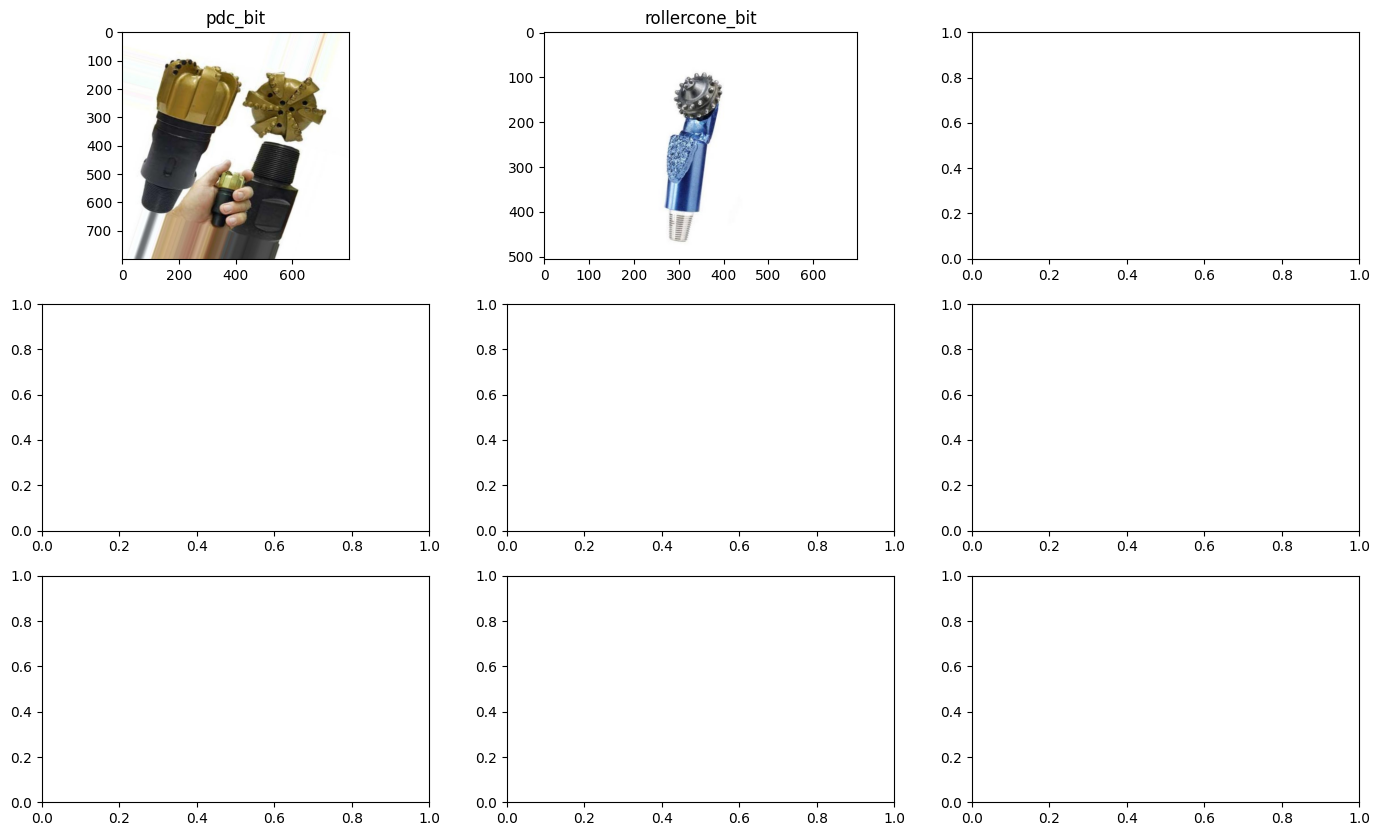

In [21]:
obj.plot_image_category(nrows=3, ncols=3)


In [22]:
obj.assemble_deep_net_model_2()


In [23]:
obj.compile_model()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 110, 110, 32)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 108, 108, 64)      18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 106, 106, 64)      36928     
                                                      

In [24]:
obj.train_model(epochs=5)


Found 14 images belonging to 2 classes.


2023-11-19 17:23:59,578 - INFO - Rescaling train data, {'pdc_bit': 0, 'rollercone_bit': 1}:


Found 2 images belonging to 2 classes.


2023-11-19 17:23:59,586 - INFO - Rescaling val data, {'pdc_bit': 0, 'rollercone_bit': 1}:


2023-11-19 17:23:59,587 - WARNING - `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of batches seen.



Epoch 2: val_accuracy improved from -inf to 0.50000, saving model to C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5

Epoch 3: val_accuracy did not improve from 0.50000

Epoch 4: val_accuracy did not improve from 0.50000

Epoch 5: val_accuracy did not improve from 0.50000


2023-11-19 17:24:07,867 - INFO - Model saved to C:\Users\atashne\Desktop\DrillBitVision\deep_model


2023-11-19 17:24:07,887 - INFO - dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


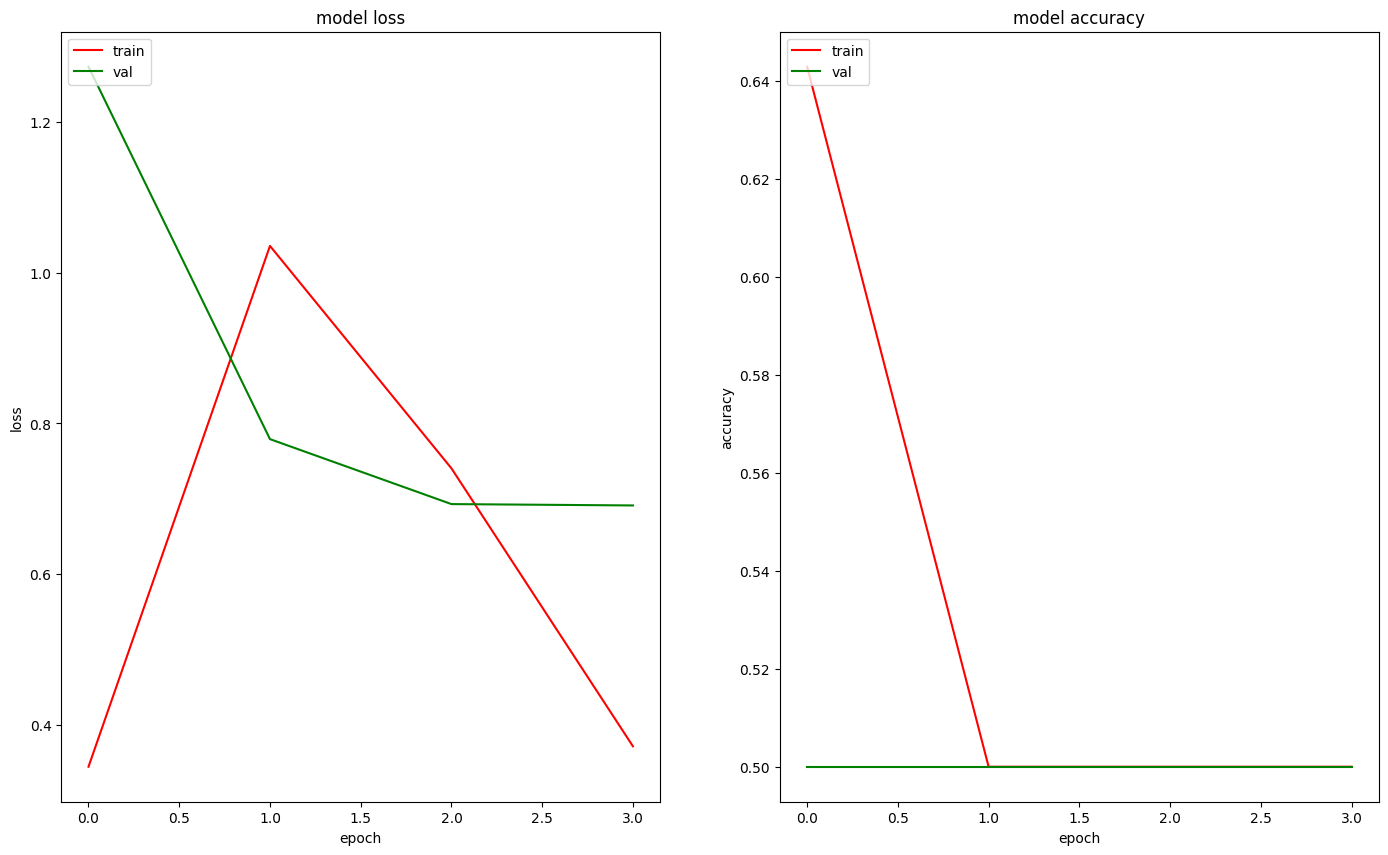

In [25]:
obj.plot_history()


2023-11-19 17:24:08,850 - INFO - Model loaded from C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


1/1 [==============================] - 0s 87ms/step


2023-11-19 17:24:08,977 - INFO - Prediction: rollercone_bit, category: pdc_bit


1/1 [==============================] - 0s 35ms/step


2023-11-19 17:24:09,055 - INFO - Prediction: rollercone_bit, category: pdc_bit


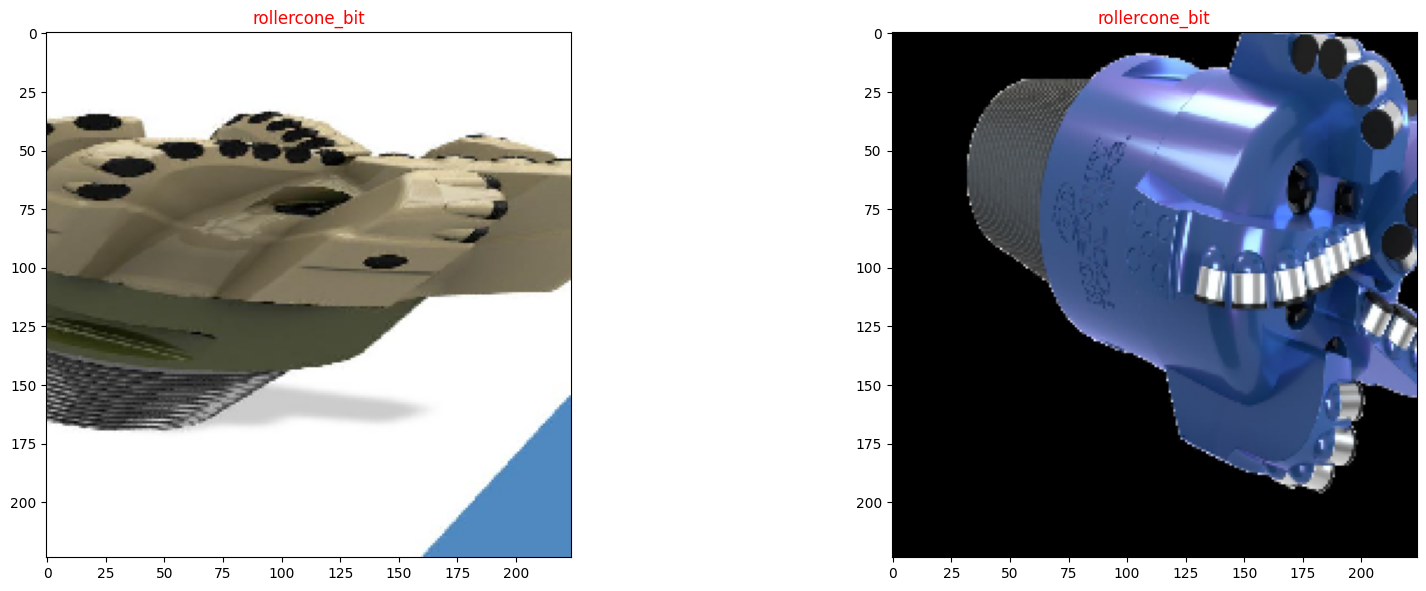

1/1 [==============================] - 0s 78ms/step


2023-11-19 17:24:09,850 - INFO - Prediction: rollercone_bit, category: rollercone_bit


1/1 [==============================] - 0s 56ms/step


2023-11-19 17:24:09,945 - INFO - Prediction: rollercone_bit, category: rollercone_bit


<Figure size 640x480 with 0 Axes>

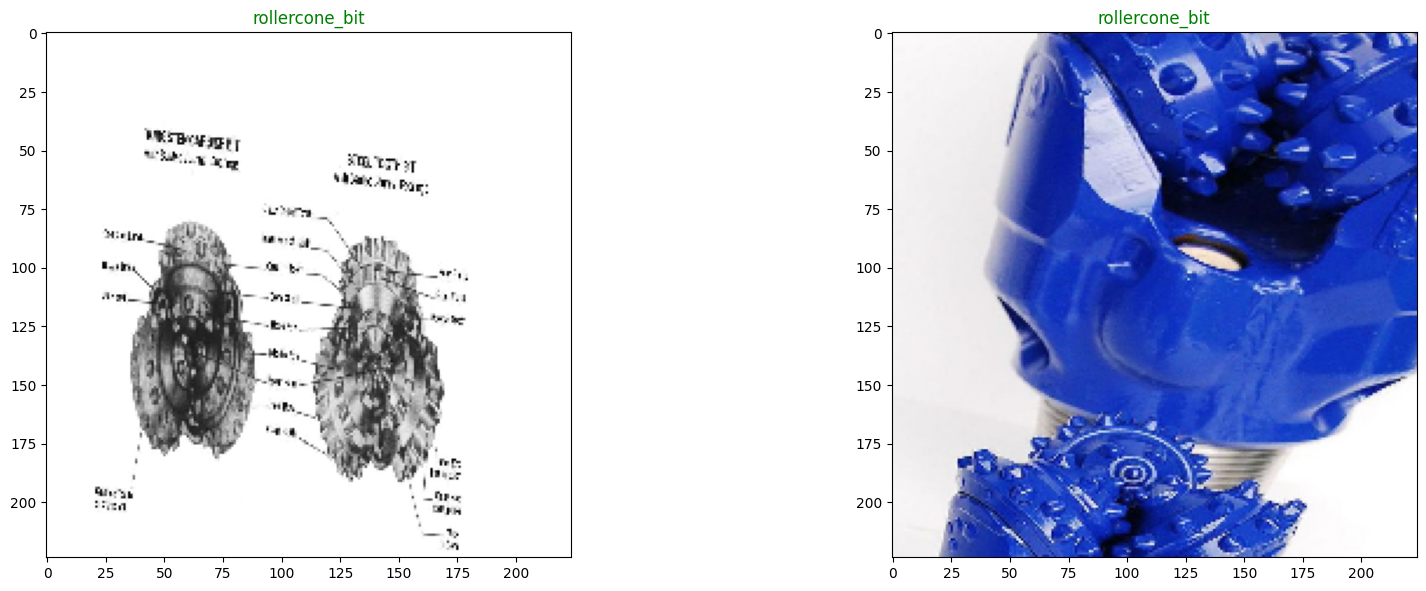

Found 4 images belonging to 2 classes.
1/1 [==============================] - 0s 189ms/step - loss: 188.2384 - accuracy: 0.5000


<Figure size 640x480 with 0 Axes>

In [26]:
obj.predict(num_rows=2, num_cols=2, figsize=(4, 10))


In [27]:
print(obj.layer_names)


{'conv_layer': ['conv2d_12', 'conv2d_13', 'conv2d_14', 'conv2d_15', 'conv2d_16', 'conv2d_17'], 'other_layer': ['max_pooling2d_7', 'dropout_10', 'max_pooling2d_8', 'dropout_11', 'max_pooling2d_9', 'dropout_12', 'flatten_3', 'dense_6', 'dropout_13', 'dense_7']}


2023-11-19 17:24:11,503 - INFO - Model loaded from C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


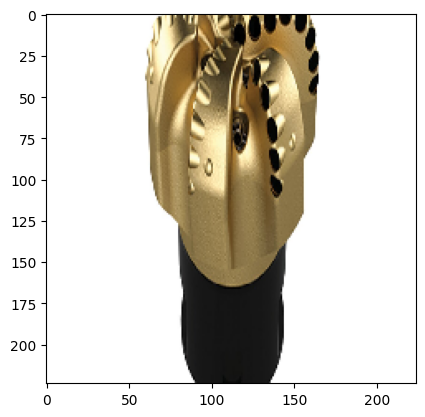

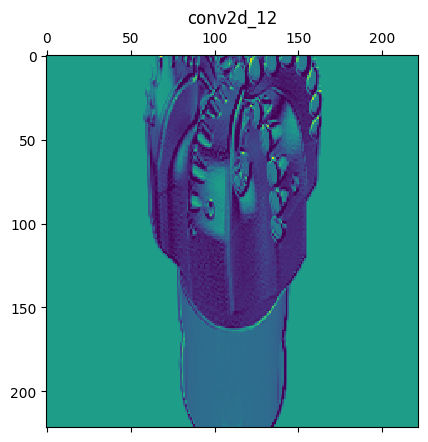

2023-11-19 17:24:12,738 - INFO - Model loaded from C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


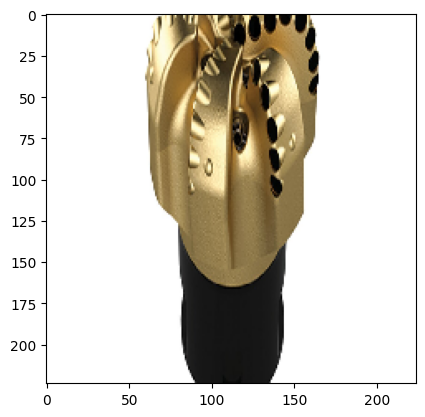

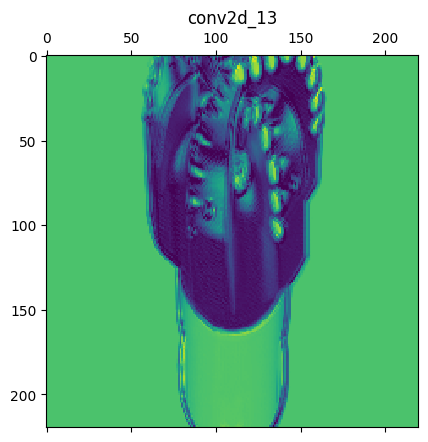

2023-11-19 17:24:14,020 - INFO - Model loaded from C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


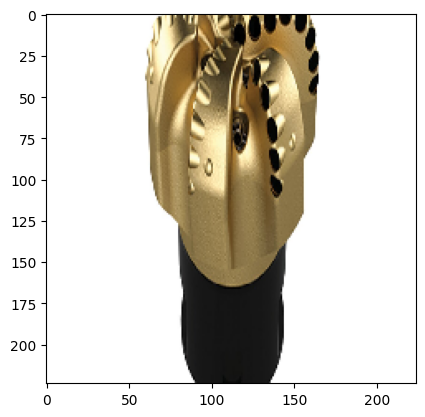

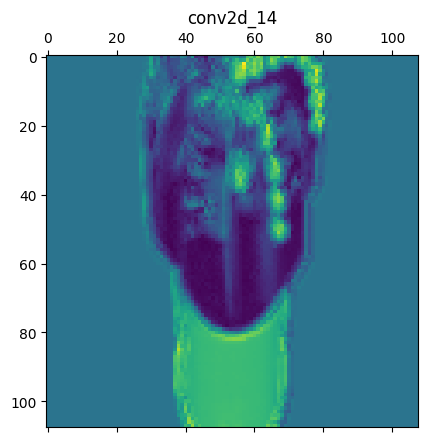

2023-11-19 17:24:15,288 - INFO - Model loaded from C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


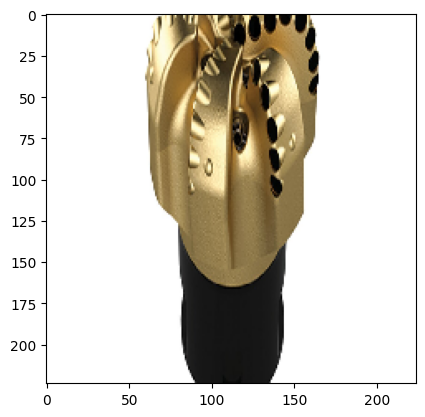

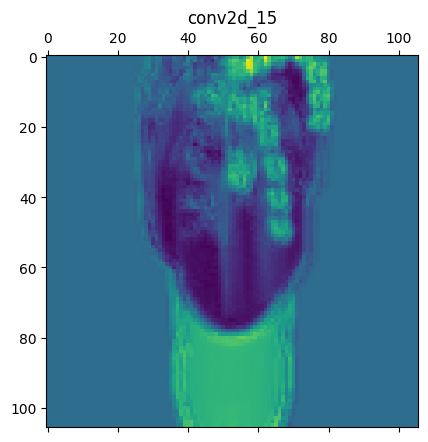

2023-11-19 17:24:16,570 - INFO - Model loaded from C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


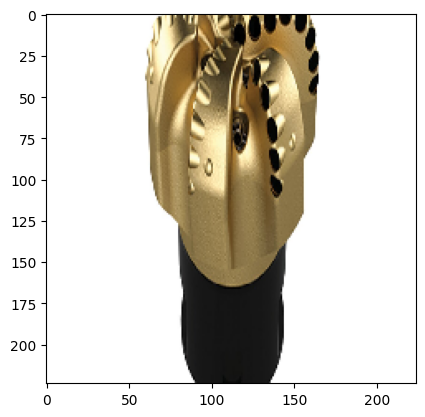

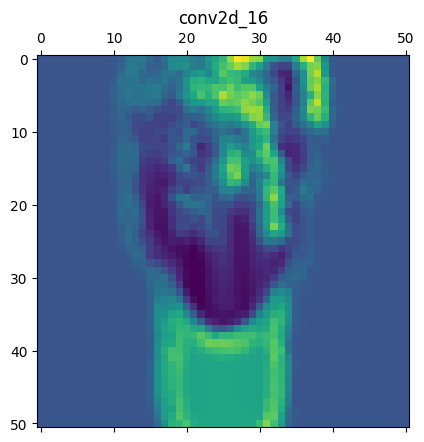

2023-11-19 17:24:18,024 - INFO - Model loaded from C:\Users\atashne\Desktop\DrillBitVision\deep_model\model_.h5


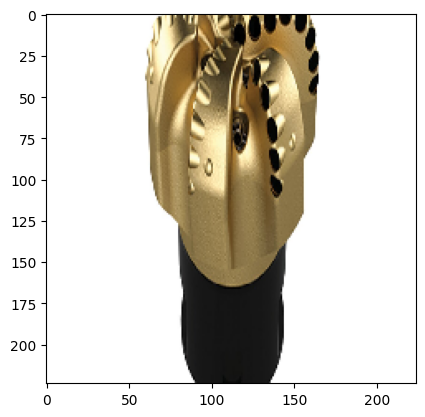

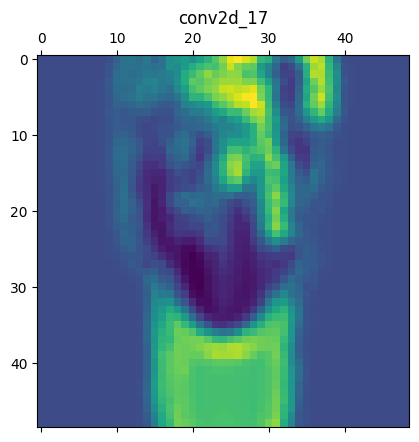

In [28]:
for conv_layer in obj.layer_names["conv_layer"]:
    obj.grad_cam_viz(
        gradcam_fig_name="test.png",
        print_layer_names=False,
        test_folder_dir=Path("__file__").parent
        / ".."
        / "dataset_train_test_val"
        / "test",
        layer_name=conv_layer,
    )